<a href="https://colab.research.google.com/github/drfibasile/Machine_Learning_Breast_implants_prediction/blob/main/Machine_Learning_Breast_implants_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary:
1. Click the right arrow
2. Use the buttons to upload or enter data
3. Hit the rectangular Run button to get outputs

- **First step for all the cells below would be to click on the right pointed arrow (one that looks like [this](https://drive.google.com/file/d/1zSfO769eJopDPgJ5TFirlRXIPL65BzYb/view?usp=share_link)); once done you can upload files, use the run button, or the textboxes by using the rectangular buttons.**

- Use the cell below to train the model. Please make sure you upload a csv. One that looks like [this](https://drive.google.com/file/d/1i6JkgURyFUOaKjf7HL0yj7iHzX0xm5M3/view?usp=sharing). This file will be used to train the model

- Please make sure you **always run the first step, i.e. train the model before attempting to make predictions in step 2 or generating visuals in step 3**

- Please make sure the values in the input file are consistent i.e. either A, B or a,b for socioeconomic throughout the data file. The training process is case sensitive and it will consider A as a separate socioeconomic category than a. Similarly, medim will be a different category than medium for relative size col. These discrepancies can significantly impact model's accuracy on top of having the potential to throw errors while running the script

In [17]:
#@title Upload file that you want to use for model training and press run (required/mandatory step)
import ipywidgets as widgets
from google.colab import files
import io
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from google.colab import drive
import joblib


uploaded = widgets.FileUpload()
display(uploaded)

def handle_submit(file_uploader):
    uploaded_file = file_uploader.data[0]
    # Create a binary stream from the file data
    stream = io.BytesIO(uploaded_file)
    data = pd.read_csv(stream, delimiter = ",")
    data = data.drop(0)
    
    try:
      data = data.drop("Unnamed: 7", axis = 1)
    except:
      pass
    try:
      data['relative size'] = data['relative size'].apply(lambda x: "medium" if x == "medim" else x)
    except:
      pass
    
    categorical_cols = ['relative size','education','socioeconomic']
    mapping = {}
    # Perform label encoding of categorical vars also store the transformations in a dict 
    le = preprocessing.LabelEncoder()
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])
        mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    joblib.dump(mapping, 'mapping.joblib')
    X = data[["age", "weight","height","relative size","education", "socioeconomic", "distance ","base width","pinch"]]
    y = data["implant_size"]
    joblib.dump(data, 'data.joblib')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    joblib.dump(y_test, 'y_test.joblib')
    joblib.dump(X_train, "X_train.joblib")
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    joblib.dump(y_pred, 'y_pred.joblib')
    mae = mean_absolute_error(y_test, y_pred)
    print("Model now trained. Mean Absolute Error: ", mae)
    #Save Model
    joblib.dump(model, 'trained_model.joblib')

run_button = widgets.Button(description="Run")
run_button.on_click(lambda x: handle_submit(uploaded))
display(run_button)


FileUpload(value={}, description='Upload')

Button(description='Run', style=ButtonStyle())

Model now trained. Mean Absolute Error:  25.322580645161292


- Please Run the cell below (click the right pointed arrow) to make predictions by either uploading a file or by using the text boxes to manually add info about a patient. Once you press the arrow, you have to either upload a file or enter data manually that you want to get predicitons on.

- Please note that you do not have to do the numerical mapping as the code takes care of it. For instance, use "HS" for education instead of 1.

- Additionally, please note different categories in the data such as A, and B in socioeconomic col etc. are case-sensitive. You cannot use a for A as the model will treat them as different labels and it will impact the accuracy score and may even casue the script to break.

- Use the upload or manual entries one at a time i.e. do not use both upload and manual entry feature simultaneously. Upload the file you want to use to make predictions and press run. Then remove the uploaded file by pressing the right pointed arrow. Now do not upload the file and use manual entries to make prediction for one patient.

- Alternatively, you can first use manual boxes. Enter values and press Run to get the prediction for one patient. Clear the entries by pressing the right pointed arrow and then can upload the file to make predictions. 

In [9]:
#@title Either upload a csv to make predictions (many at a time) or use the input space to fill manually (one at a time) without numerical mapping
import ipywidgets as widgets
from google.colab import files

# Load the trained model from the file
model = joblib.load('trained_model.joblib')
# Load Mappings
mapping = joblib.load('mapping.joblib')

# Create widgets
uploaded = widgets.FileUpload()

categorical_cols = ['relative size','education','socioeconomic']
textboxes = []
feature_names = ["age", "weight","height","relative size","education", "socioeconomic", 'distance ', 'base width','pinch']
for i in range(len(feature_names)):
    textbox = widgets.Text(description=feature_names[i])
    textboxes.append(textbox)

def handle_upload(sender):
    uploaded_file = sender.data[0]
    # Create a binary stream from the file data
    new_data = pd.read_csv(io.StringIO(uploaded_file.decode()), delimiter = ',')
    try:
      new_data = new_data.drop("Unnamed: 7", axis = 1)
    except:
      pass
    new_data = new_data.drop(0)
    new_data = new_data[feature_names]
    new_data['relative size'] = new_data['relative size'].apply(lambda x: "medium" if x == "medim" else x)
    # Create a new Pandas DataFrame with the feature names
    new_data = pd.DataFrame(new_data, columns=feature_names)
    # Transform the input features using the same encoding used in the first step
    for col in categorical_cols:
        new_data[col] = new_data[col].map(mapping[col])
    # Use the model to make predictions on the new data
    predicted_y = model.predict(new_data)
    # Print the predicted value of y
    print("Predicted value/s of y: ", predicted_y)

def handle_textbox(sender):
    features = [textbox.value for textbox in textboxes]
    new_data = pd.DataFrame([features], columns=feature_names)
    for col in categorical_cols:
        new_data[col] = new_data[col].map(mapping[col])
        
    predicted_y = model.predict(new_data)
    print("Predicted value of implant_size: ", predicted_y)

def handle_submit(sender):
    if uploaded.data:
        handle_upload(uploaded)
    else:
        handle_textbox(textboxes)

# Display widgets
display(uploaded)
for textbox in textboxes:
    display(textbox)

# Manage Run Button
run_button = widgets.Button(description="Run")
run_button.on_click(handle_submit)
display(run_button)

FileUpload(value={}, description='Upload')

Text(value='', description='age')

Text(value='', description='weight')

Text(value='', description='height')

Text(value='', description='relative size')

Text(value='', description='education')

Text(value='', description='socioeconomic')

Text(value='', description='distance ')

Text(value='', description='base width')

Text(value='', description='pinch')

Button(description='Run', style=ButtonStyle())

Predicted value/s of y:  [350. 380. 230. 400. 450. 325. 350. 300. 280. 280. 350. 350. 350. 325.
 350. 450. 350. 230. 260. 280. 350. 260. 260. 325. 300. 300. 230. 350.
 260. 350. 280. 400. 280. 260. 280. 260. 320. 400. 325. 380. 260. 230.
 380. 350. 280. 380. 300. 280. 350. 325. 325. 325. 280. 380. 260. 350.
 260. 400. 280. 260. 300. 350. 300. 260. 450. 380. 325. 380. 300. 380.
 450. 350. 300. 380. 380. 300. 230. 400. 350. 450. 350. 350. 260. 260.
 450. 260. 350. 300. 380. 325. 200. 350. 300. 280. 325. 350. 300. 450.
 260. 350. 280. 325. 230.]


Run the cell below after clicking the right pointed arrow to get:
- Heatmap

- Model performance visual (line and scatter plot)

Button(description='Run', style=ButtonStyle())

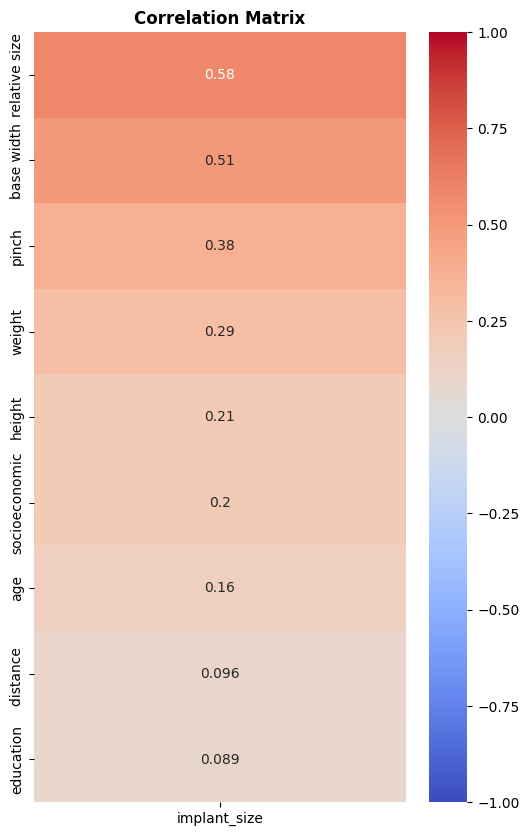

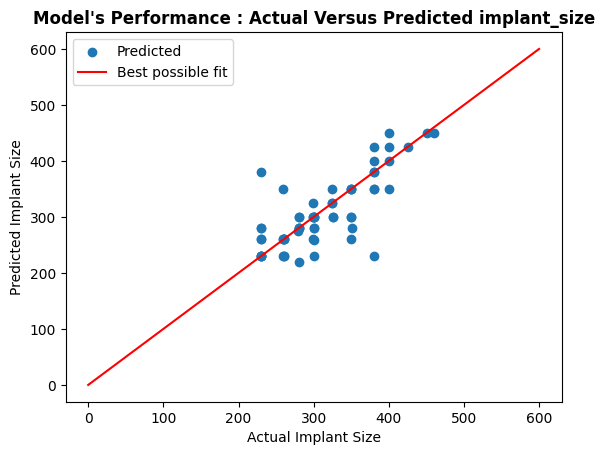

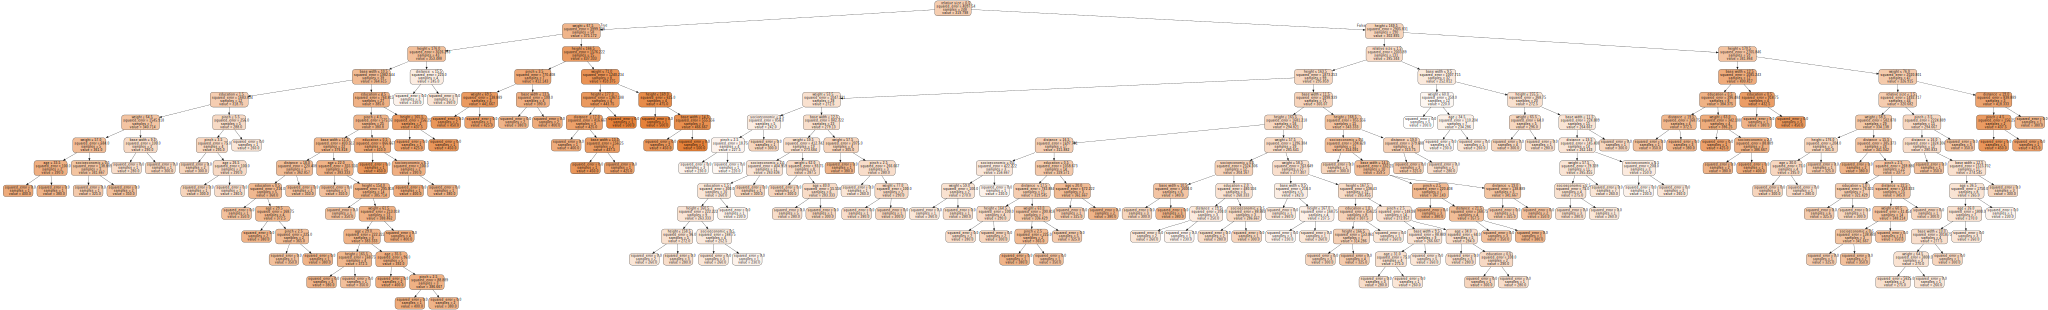

In [14]:
#@title Run this cell to get all the visuals
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import scipy.stats as stats
import graphviz
import seaborn as sns
import random
import numpy as np

# Load neccessary data from the previous cells
data = joblib.load("data.joblib")
y_pred = joblib.load("y_pred.joblib")
y_test = joblib.load("y_test.joblib")
model = joblib.load('trained_model.joblib')
X_train = joblib.load("X_train.joblib")


def heatmap(sender): #sender argument serves the purpose of matching the signature of on_click event handler
    correlations = data.corr()
    correlations = correlations[['implant_size']]
    correlations = correlations.drop(['implant_size','PATIENT','Unnamed: 0'])
    correlations.loc['relative size'] *= -1

    sorted_correlations = correlations.sort_values(by='implant_size',ascending=False)
   
    
    # create the heatmap
    plt.figure(figsize=(6,10))
    ax = sns.heatmap(sorted_correlations, annot=True, vmin=-1, vmax=1, cmap="coolwarm")

    # # calculate p-values
    # p_values = pd.DataFrame(np.zeros_like(correlations), columns=correlations.columns, index=correlations.index)
    # for i in correlations.columns:
    #     for j in correlations.index:
    #         pearson_coef, p_value = stats.pearsonr(data[i], data[j])
    #         p_values.loc[j, i] = p_value
    # p_values = p_values[['implant_size']]
    # #p_values = p_values.drop(['implant_size','PATIENT','Unnamed: 0'])

    # # add p-values to heatmap
    # for i in range(len(p_values.columns)):
    #     for j in range(len(p_values.index)):
    #         text = ax.text(i+0.6, j+0.6, '{:.3f}\n({:.3f})'.format(sorted_correlations.iloc[j, i], p_values.iloc[j, i], np.std(data[p_values.index[j]])), ha="left", va="baseline", color="b")

    # ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
    plt.title('Correlation Matrix', fontweight='bold')
    plt.show()
    print('\n')

def scatter_plot(sender):
  # Add jitter to the data points
  x_jitter = [x + random.uniform(-0.5,0.5) for x in y_test]
  y_jitter = [x + random.uniform(-0.5,0.5) for x in y_pred]

  plt.scatter(x_jitter, y_jitter)
  plt.xlabel("Actual Implant Size")
  plt.ylabel("Predicted Implant Size")
  plt.plot([0, 600], [0, 600], 'r-')
  plt.legend(["Predicted","Best possible fit"])
  plt.title("Model's Performance : Actual Versus Predicted implant_size", fontweight='bold')
  plt.show()
  print("\n")

def decision_tree(sender):
  dot_data = export_graphviz(model, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)
  graph = graphviz.Source(dot_data)
  display(graph)

def wrapper(sender):
    heatmap(sender)
    scatter_plot(sender)
    decision_tree(sender)

# Manage Run Button
run_button = widgets.Button(description="Run")
run_button.on_click(wrapper) #on_click expects a func with a single argument which is the button object that is clicked , here provided by using nested class.method technique though it does not matter as the wrapper func is not using it
display(run_button) 
  


FileUpload(value={}, description='Upload')

Button(description='Run', style=ButtonStyle())



Actual V. Predicted SD:  23.66
Actual V. Predicted p-value:  0.95




,Predicted Implant Size,Actual Implant Size
0,350.0,350.0
1,380.0,380.0
2,300.0,280.0
3,400.0,400.0
4,450.0,425.0
...,...,...
98,230.0,230.0
99,325.0,300.0
100,280.0,280.0
101,380.0,380.0


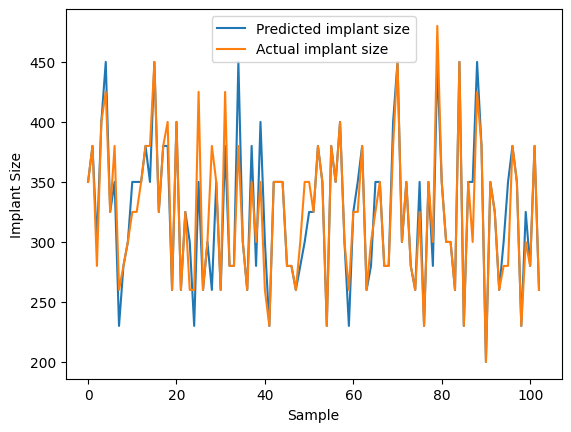

In [15]:
#@title Actual versus predicted: comparison upload data file to view comparisons
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_1samp

# Load the trained model from the file
model = joblib.load('trained_model.joblib')
# Load Mappings
mapping = joblib.load('mapping.joblib')

# Create widgets
uploaded = widgets.FileUpload()

categorical_cols = ['relative size','education','socioeconomic']
textboxes = []
feature_names = ["age", "weight","height","relative size","education", "socioeconomic", 'distance ', 'base width','pinch']

def handle_upload(sender):
    uploaded_file = sender.data[0]
    # Create a binary stream from the file data
    new_data = pd.read_csv(io.StringIO(uploaded_file.decode()), delimiter = ',')
    try:
      new_data = new_data.drop("Unnamed: 7", axis = 1)
    except:
      pass
    new_data = new_data.drop(0)
    actual_implant_sizes = new_data['implant_size'].tolist()
    new_data = new_data[feature_names]
    new_data['relative size'] = new_data['relative size'].apply(lambda x: "medium" if x == "medim" else x)
    # Create a new Pandas DataFrame with the feature names
    new_data = pd.DataFrame(new_data, columns=feature_names)
    # Transform the input features using the same encoding used in the first step
    for col in categorical_cols:
        new_data[col] = new_data[col].map(mapping[col])
    # Use the model to make predictions on the new data
    predicted_y = model.predict(new_data)
    # Print the predicted value of y
    #print("Predicted values of implant size: ", predicted_y)
    #print("Actual values of implant size: ", actual_implant_sizes)
    df = pd.DataFrame({"Predicted Implant Size":predicted_y, "Actual Implant Size":actual_implant_sizes})
    df = df.reset_index(drop=True)
    
    plt.plot(predicted_y, label="Predicted implant size")
    plt.plot(actual_implant_sizes, label= "Actual implant size")
    print("\n")
    print("Actual V. Predicted SD: ",f'{np.std(actual_implant_sizes-predicted_y):.2f}')
    t, p = ttest_1samp(actual_implant_sizes - predicted_y, 0)
    print("Actual V. Predicted p-value: ",f'{p:.2f}')
    print("\n")
    display(df)
    plt.xlabel("Sample")
    plt.ylabel("Implant Size")
    plt.legend()
    plt.show()
def handle_submit(sender):
  if uploaded.data:
      handle_upload(uploaded)
  else:
      print("Please upload the data file to view comparisons.")


# Manage Run Button
run_button = widgets.Button(description="Run")
run_button.on_click(handle_submit)
display(uploaded)
display(run_button)
